In [11]:
from TO_sim.get_rrrp import get_K_r_rp,get_K_r_rp_full
import numpy as np
import matplotlib.pyplot as plt
from TO_sim.get_simul import get_r_y
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from tqdm.notebook import tqdm

In [15]:
K = 0
seed = 11
N = 5000
m = 6
theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
omega = omega - np.mean(omega)
omega = np.sort(omega)
Y = np.r_[theta_random,theta_random]

In [16]:
Ks = np.arange(0,15,0.1)
r0s = []
rps = []
rms = []
rss = []

rpls = []
rmls = []
N0s = []
NPs = []
NMs = []

c_ss = []
avg_thetas = []
y_s = []

for K in tqdm(Ks):
    r0,rp,rm,rs,rpl,rml,N0,NP,NM,rstd,Y,avg_theta,c_s = get_r_y(K,m,Y,omega,N,tend=2500)
    r0s.append(r0)
    rps.append(rp)
    rms.append(rm)
    rss.append(rs)
    rpls.append(rpl)
    rmls.append(rml)
    N0s.append(N0)
    NPs.append(NP)
    NMs.append(NM)
    c_ss.append(c_s)
    avg_thetas.append(avg_theta)
    y_s.append(Y.copy())

  0%|          | 0/150 [00:00<?, ?it/s]

In [17]:
np.savez('DATA_hys cluster dK 0.1.npz',Ks=Ks,r0s=r0s,rps=rps,rms=rms,rss=rss,rpls=rpls,rmls=rmls,N0s=N0s,NPs=NPs,NMs=NMs)
np.savez('DATA_hys avg_thetas dK 0.1.npz',Ks=Ks,avg_thetas=avg_thetas)
np.savez('DATA_hys y_s dK 0.1.npz',Ks=Ks,y_s=y_s)
np.savez('DATA_hys c_ss dK 0.1.npz',Ks=Ks,c_ss=c_ss)

In [13]:
R_u,R_0u,R_d,R_0d,RP1_u,RPl_u,RP1_d,RPl_d,K1p,K_u,K_d,K_start = get_K_r_rp_full(m)

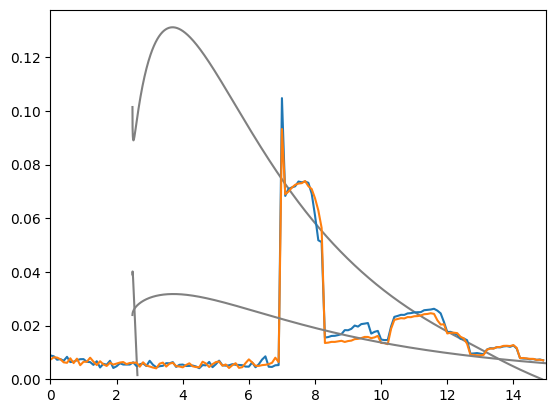

In [34]:

plt.plot(K_u,RP1_u,color='gray')
plt.plot(K_u,RP1_d,color='gray')

plt.plot(Ks,rms)
plt.plot(Ks,rps)
plt.plot(K_u, (R_0u - R_u)/2,color='gray')

plt.xlim(0,15)
plt.ylim(0,)
plt.show()

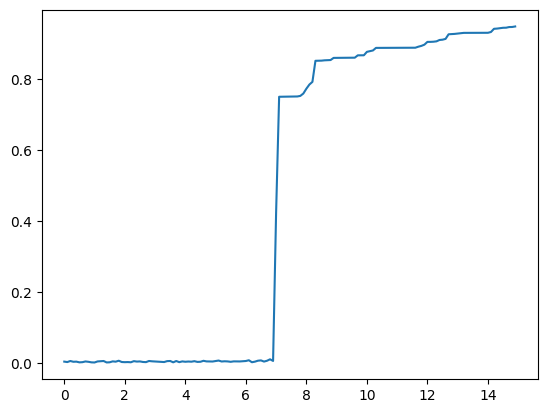

In [46]:
plt.plot(Ks,r0s)

In [19]:
avg_thetas = np.array(avg_thetas)
types = []
Ns = np.arange(N)
type_ = np.nan * np.ones(N)
for i, c_s in enumerate(c_ss):
    _0 = Ns[c_s['0']]
    _p = Ns[c_s['+l']]
    _m = Ns[c_s['-l']]
    TY = type_.copy()
    TY[_0] = 0
    TY[_p] = +1
    TY[_m] = -1
    types.append(TY)
# types를 color로 mapping하는 colormap을 만듭니다.
from matplotlib.colors import ListedColormap

# 예시: type이 -1, 0, +1이므로, 각각 파랑, 회색, 빨강으로 지정
type_colors = {-1: 'blue', 0: 'grey', 1: 'red'}

# N개에 대해, 각 type 값에 맞는 색상을 리스트로 변환
def map_types_to_colors(type_array):
    return [type_colors.get(t, 'black') for t in type_array]

# types 리스트 전체를 색상 리스트로 변환
# (만약 각 types가 shape (N,)라면 목록 생성, shape가 다르면 적절히 수정)
types_colors = [map_types_to_colors(TY) for TY in types]


In [63]:
a = 1 / np.sqrt(K_u*R_u*m)
b = 4 / np.pi * a - 0.3056 * a**3
b = np.where(a>1.193,1,b)
OP_ = b * K_u*R_u

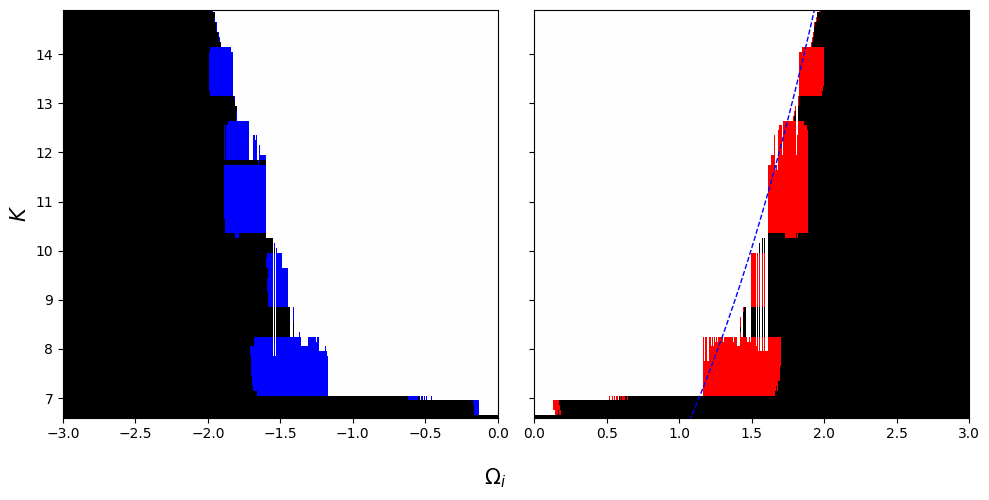

In [58]:
fig,(ax,ax1) = plt.subplots(1,2,figsize=(10,5),sharey=True)
ax.pcolormesh(omega,Ks[67:],np.array(types[67:]),cmap='bwr')
ax.set_facecolor('k')
ax.set_xlim(-3,0)
ax1.pcolormesh(omega,Ks[67:],np.array(types[67:]),cmap='bwr')
plt.plot(OP_,K_u,color='blue',lw=1,ls ='--')
ax1.set_facecolor('k')
ax1.set_xlim(0,3)
ax1.set_ylim(6.6,14.9)
plt.tight_layout()
ax.set_ylabel(r'$K$',fontsize=15)
fig.supxlabel(r'$\Omega_i$',fontsize=15)
fig.tight_layout()

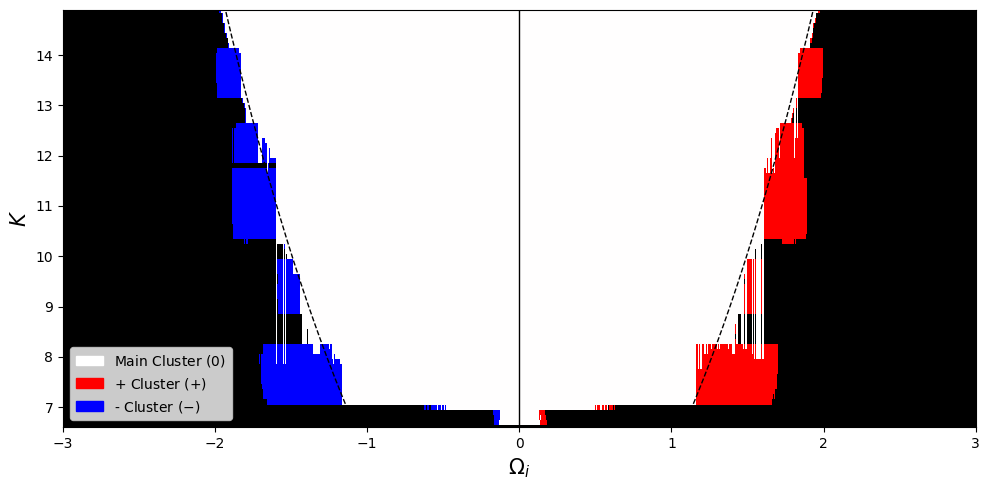

In [72]:
plt.figure(figsize=(10,5))
plt.pcolormesh(omega,Ks[67:],np.array(types[67:]),cmap='bwr')
import matplotlib.patches as mpatches

# pcolormesh의 bwr에서 0은 white, 1은 red, -1은 blue임을 표현하는 범례 추가
main_patch = mpatches.Patch(color='white', label=r'Main Cluster $(0)$')
plus_patch = mpatches.Patch(color='red', label=r'+ Cluster $(+)$')
minus_patch = mpatches.Patch(color='blue', label=r'- Cluster $(-)$')
plt.legend(handles=[main_patch, plus_patch, minus_patch], loc='lower left', frameon=True)
plt.gca().set_facecolor('k')
plt.xlim(-3,3)
plt.ylim(6.6,14.9)
plt.plot(OP_,K_u,color='black',lw=1,ls ='--')
plt.plot(-OP_,K_u,color='black',lw=1,ls ='--')
plt.axvline(0,color='black',lw=1,ls ='-')
plt.tight_layout()
plt.ylabel(r'$K$',fontsize=15)
plt.xlabel(r'$\Omega_i$',fontsize=15)
plt.tight_layout()

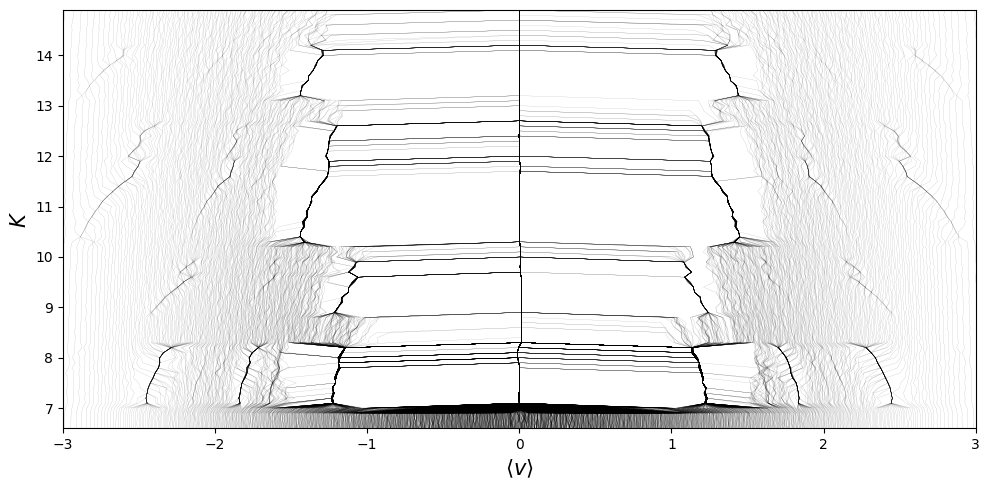

In [75]:
plt.figure(figsize=(10,5))

plt.plot(avg_thetas,Ks,c='k',alpha=0.5,lw=0.1);
plt.xlim(-3,3)
plt.ylim(6.6,14.9)
plt.tight_layout()
plt.ylabel(r'$K$',fontsize=15)
plt.xlabel(r'$\left\langle v\right\rangle$',fontsize=15)
plt.tight_layout()


